# 회귀와 분류에 대한 트리 기반의 방법들(1)

* Code Reference: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

In [1]:
from sklearn import datasets
import numpy as np

### iris 데이터에 대한 탐색적 분석

In [2]:
iris = datasets.load_iris()
num_sample, num_feature = iris.data.shape

print("Number of samples: {}".format(num_sample))
print("Number of features: {}".format(num_feature))

Number of samples: 150
Number of features: 4


In [3]:
print("Feature names: ", iris.feature_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print("Features to use: ", iris.feature_names[2:])

Features to use:  ['petal length (cm)', 'petal width (cm)']


In [5]:
X = iris.data[:, [2, 3]] # 설명 변수는 행렬 형태로 주로 나타나서 대문자로 많이 씀
y = iris.target # 반응 변수는 주로 벡터 형태라 소문자로 많이 씀

In [6]:
X[:4,] # 자료형과 데이터 타입은 중간중간 확인해주는 것이 좋다.

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2]])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### 의사결정나무 모형에 적합시키기 전, 데이터 전처리
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
* https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
* https://numpy.org/doc/stable/reference/generated/numpy.hstack.html

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # random_state : seed 값 주는 거랑 같다. stratify : 분리 이전의 클래스 비율을 분리 후에도 똑같이 맞춰준다

In [11]:
print('label count of y:', np.bincount(y))
print('label count of y_train:', np.bincount(y_train))
print('label count of y_test:', np.bincount(y_test))

label count of y: [50 50 50]
label count of y_train: [35 35 35]
label count of y_test: [15 15 15]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 시각화

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [15]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # markers, colormaps
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 의사결정나무(decision tree)
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Deicision tree를 분류하는 모델(분류기) 호출

# Gini Impurity 
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1) # gini index를 사용하고, 최대 깊이는 4로 지정

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

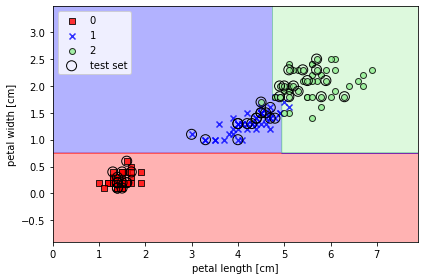

In [17]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

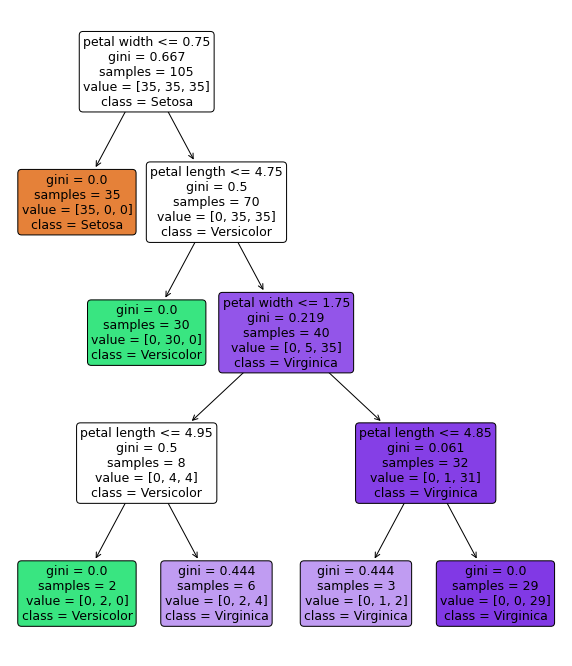

In [18]:
plt.figure(figsize=(10,12))
tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()

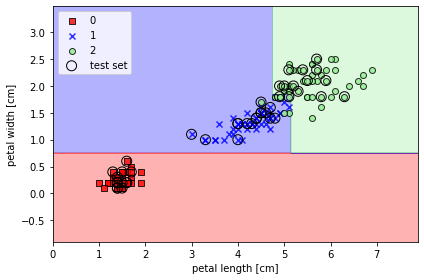

In [19]:
# Entropy
tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=4, 
                                    random_state=1)

tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

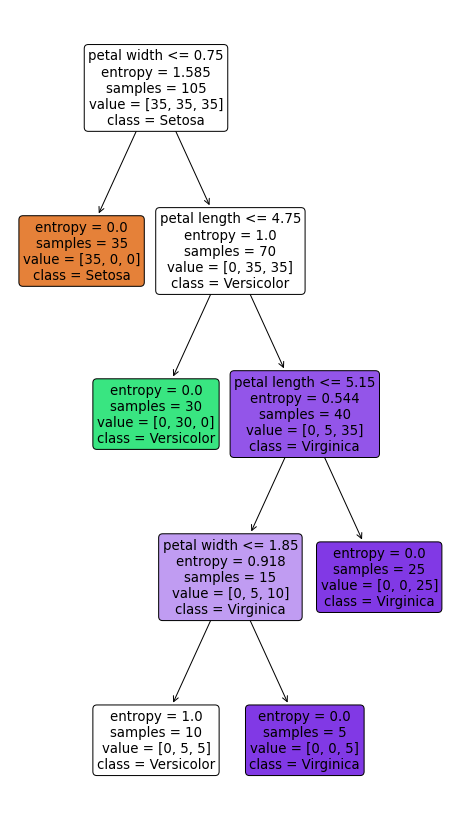

In [20]:
plt.figure(figsize=(8,15))
tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()